![MicrosoftFilm](images/MicrosoftFilm.jpg)
# Movies for Microsoft: A Film Market Analysis

**Authors:** Jacob Heyman, Mitch Krieger
***
*Project overview, Dataset information and cleaning can be found here* (XXXX INSERT HYPERLINK XXXX)
***
## Analysis
This notebook focuses how on various facors (year, runtime_minutes, genre, production_budget, principle_crew (nmconst), averagerating) affect those our grosses metrics in our analysis for movies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper_functions import *

### Genre Investigation
First we created a matrix of genres plotting their `worldwide_net` over the past 10 years:

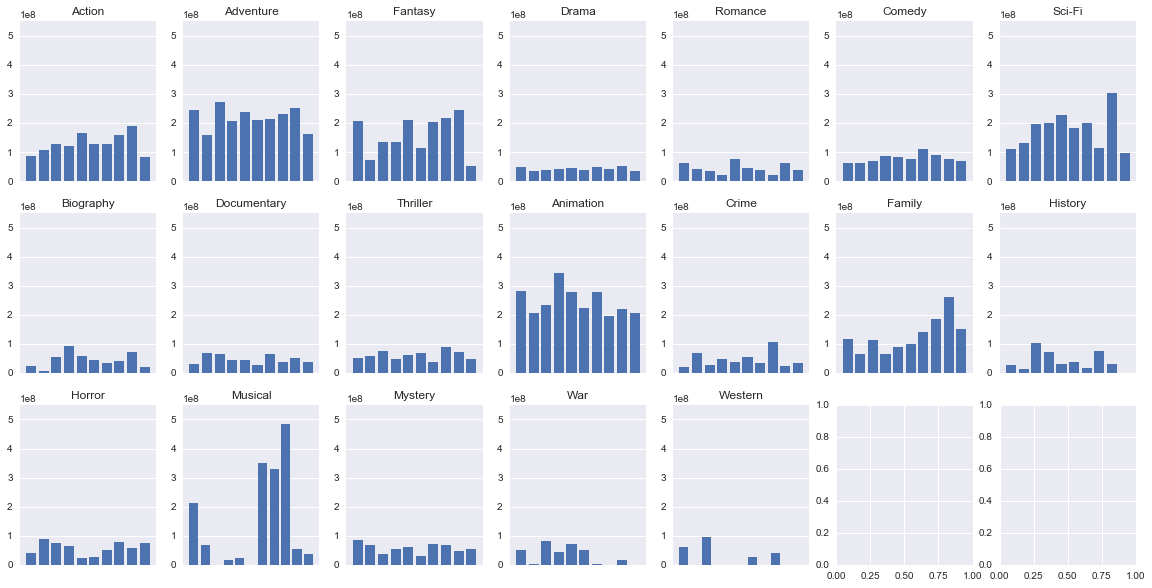

In [2]:
genre_list = ['Action','Adventure','Fantasy','Drama','Romance','Comedy',
              'Sci-Fi','Biography','Documentary','Thriller','Animation',
              'Crime','Family','History','Horror','Musical','Mystery',
              'War','Western']

figure_gross_genre, ax = plt.subplots(figsize = (20,10),ncols=7, nrows=3)
for i,genre in enumerate(genre_list):
    col = i%7
    row = i//7
    genre_vs_net(genre,ax[row][col])

***
Between these diagrams we can itentify that Action, Adventure, Fantasy, Sci-Fi, Animation, and musical films often have a high gross. However, these movies also often have a large budget, potentially lowering their return on investment.

Doing the same for `percent_gross`:

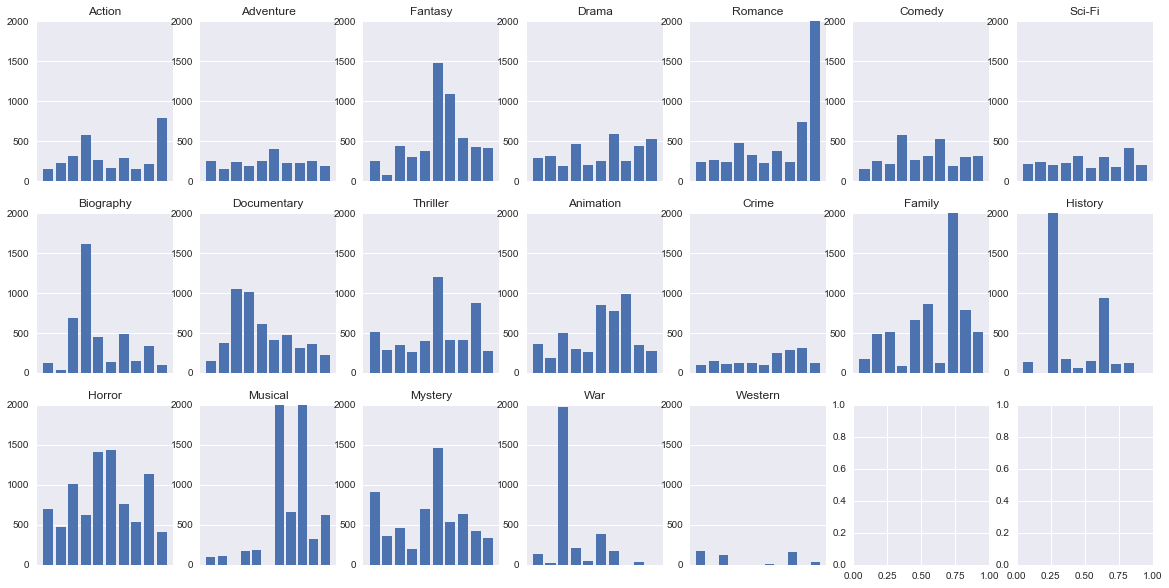

In [3]:
figure_percent_genre, ax = plt.subplots(figsize = (20,10),ncols=7, nrows=3)
for i,genre in enumerate(genre_list):
    col = i%7
    row = i//7
    genre_vs_percent_gross(genre,ax[row][col])

When considering percent gross horror, thriller, documentary and mystery emerge as potentially lucarative. Animation, fantasy and family movies also see high returns.

### Budget investigation
Breaking up budgets into budget categories to see whether high, low or budgets somwhere in-between would create better return on investments:

In [4]:
ex_high_budget_df = noZero_gross.loc[noZero_gross.production_budget > 85000000]
high_budget_df = noZero_gross.loc[(noZero_gross.production_budget < 85000000)  & 
                                  (noZero_gross.production_budget > 20000000)]
med_budget_df = noZero_gross.loc[(noZero_gross.production_budget < 20000000)  & 
                                 (noZero_gross.production_budget > 5000000)]
low_budget_df = noZero_gross.loc[(noZero_gross.production_budget < 5000000) & 
                                 (noZero_gross.production_budget > 500000)]
ex_low_budget_df = noZero_gross.loc[noZero_gross.production_budget < 500000]

budget_cat = [ex_high_budget_df, high_budget_df, med_budget_df, low_budget_df, ex_low_budget_df]

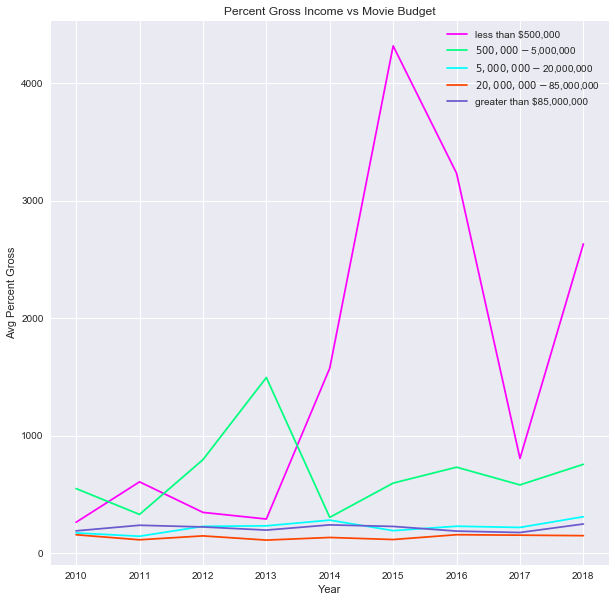

In [5]:
figure_budget, ax = plt.subplots(figsize = (10,10))

y_values = [budget.groupby(['start_year'])['percent_gross'].mean()[:9] for budget in budget_cat]
x = y_values[0].index

ax.plot(x,y_values[4], label = 'less than $500,000', color='magenta')
ax.plot(x,y_values[3], label = '$500,000 - $5,000,000', color = 'springgreen')
ax.plot(x,y_values[2], label = '$5,000,000 - $20,000,000', color = 'cyan')
ax.plot(x,y_values[1], label = '$20,000,000 - $85,000,000', color = 'orangered')
ax.plot(x,y_values[0], label = 'greater than $85,000,000', color = 'slateblue')
ax.set_title('Percent Gross Income vs Movie Budget')
ax.set_xlabel('Year')
ax.set_ylabel('Avg Percent Gross')

plt.legend()

From this graph we can infer that lower buget films have a much higher likelihood of a high ROI but high budget films more consitently have a positive return. Further demonstrating this is the following kernel density estimate plot:

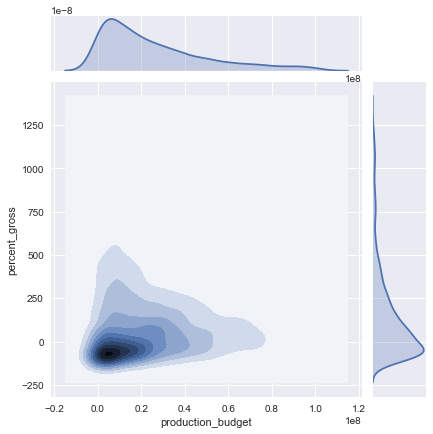

In [6]:
#Eliminate major outliers via quantile
outlier_tolerance_pgross = noZero_gross.percent_gross.quantile(.95)

sns.jointplot(noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.production_budget <=1e8)].production_budget,
              noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.production_budget <=1e8)].percent_gross,
              kind="kde")